In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gtfparse import read_gtf
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [225]:
lnc_raw_data = pd.read_csv("data/merged_data.csv")
lnc_raw_data.head()

,Unnamed: 0,Gene_ID,Mann-Whitney p-value,hek_av,sgRNAs passing filter,screen score,hek_RNA,closest protein-coding gene,distance to closest protein-coding gene TSS (bp),closest protein-coding gene K562 growth phenotype (gamma),...,score_mcf7_av,score_mcf7_RNA,score_231_av,score_231_RNA,score_hela_av,score_hela_RNA,score_u87_av,score_u87_RNA,score_final,final_final_score
0,0,LH00343,0.839243,-0.001557,10.0,0.005136,18636.275,HFM1,17568.0,-0.069708,...,0,0,0,0,1,0,0,0,2,0
1,1,LH00741,0.699394,0.014434,10.0,0.097134,6656.195,ZP4,287528.0,0.028805,...,0,0,0,0,0,0,0,0,1,0
2,2,LH07794,0.156959,0.040152,10.0,1.399483,1749.640,ATP4A,88.0,-0.017370,...,0,0,0,0,0,0,0,0,1,0
3,3,LH16723,0.569026,-0.007826,9.0,0.083049,1370.205,IRS4,317779.0,0.003138,...,0,0,0,0,0,0,0,0,1,0
4,4,LH03566,0.414855,0.007003,9.0,0.115980,1191.240,GAPDH,353.0,-0.095291,...,0,0,0,0,0,0,0,0,1,0


In [226]:
lnc_raw_score_data = pd.read_csv("data/score_0.csv")
lnc_raw_score_data.head()

,Unnamed: 0,Gene_ID,Mann-Whitney p-value,hek_av,sgRNAs passing filter,screen score,hek_RNA,closest protein-coding gene,distance to closest protein-coding gene TSS (bp),closest protein-coding gene K562 growth phenotype (gamma),...,score_mcf7_av,score_mcf7_RNA,score_231_av,score_231_RNA,score_hela_av,score_hela_RNA,score_u87_av,score_u87_RNA,score_final,final_final_score
0,0,LH00343,0.839243,-0.001557,10.0,0.005136,18636.275,HFM1,17568.0,-0.069708,...,0,0,0,0,1,0,0,0,2,0
1,1,LH00741,0.699394,0.014434,10.0,0.097134,6656.195,ZP4,287528.0,0.028805,...,0,0,0,0,0,0,0,0,1,0
2,2,LH07794,0.156959,0.040152,10.0,1.399483,1749.640,ATP4A,88.0,-0.017370,...,0,0,0,0,0,0,0,0,1,0
3,3,LH16723,0.569026,-0.007826,9.0,0.083049,1370.205,IRS4,317779.0,0.003138,...,0,0,0,0,0,0,0,0,1,0
4,4,LH03566,0.414855,0.007003,9.0,0.115980,1191.240,GAPDH,353.0,-0.095291,...,0,0,0,0,0,0,0,0,1,0


In [227]:
lnc_raw_score_data.shape

(3195, 46)

In [228]:
lnc_raw_data.shape

(5991, 46)

In [240]:
lnc_raw_score_data_short = lnc_raw_score_data.filter(['Gene_ID', 'Transcript ID', 'gene name','chromosome', 'strand', 'TSS source','primary TSS 5prime', 'primary TSS 3prime'], axis=1)
lnc_raw_score_data_short.shape

(3195, 8)

In [231]:
gene_id_info = pd.read_excel("data/aah7111-TableS1.xlsx",index_col=0)

/home/koval/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [239]:
lnc_raw_score_data_short = lnc_raw_score_data_short.rename(columns={"gene name": "gene_name","Transcript ID":"annot_tr" ,"primary TSS 5prime": "primary_TSS_5prime", "primary TSS 3prime": "primary_TSS_3prime" })
result_2 = lnc_raw_score_data_short.drop(lnc_raw_score_data_short[(lnc_raw_score_data_short.gene_name == '-')].index)
result_2.shape

(2107, 8)

In [241]:
result_2.dtypes

Gene_ID               object
annot_tr              object
gene_name             object
chromosome            object
strand                object
TSS source            object
primary_TSS_5prime     int64
primary_TSS_3prime     int64
dtype: object

In [242]:
come_genecode_19 = pd.read_csv('data/result_19.txt', delimiter = "\t")
come_genecode_41 = pd.read_csv('data/result_41.txt', delimiter = "\t")

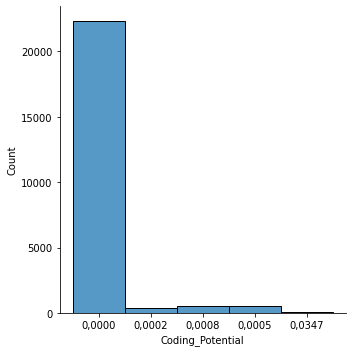

In [243]:
sns.displot(come_genecode_19, x="Coding_Potential")

In [244]:
come_genecode_19.shape

(23898, 14)

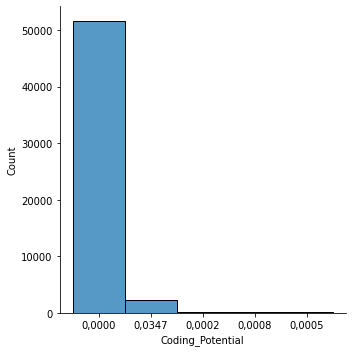

In [245]:
sns.displot(come_genecode_41, x="Coding_Potential")

In [246]:
come_genecode_41.shape

(54291, 14)

In [247]:
come_genecode_19_pc = come_genecode_19[come_genecode_19['Prediction']=='coding']
come_genecode_41_pc = come_genecode_41[come_genecode_41['Prediction']=='coding']
genecode38 = read_gtf("data/gencode.v38.long_noncoding_RNAs.gtf")
genecode38.shape

/home/koval/.local/lib/python3.8/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/home/koval/.local/lib/python3.8/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'tag', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id']


(245213, 22)

In [248]:
genecode38.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245213 entries, 0 to 245212
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   seqname                   245213 non-null  object 
 1   source                    245213 non-null  object 
 2   feature                   245213 non-null  object 
 3   start                     245213 non-null  int64  
 4   end                       245213 non-null  int64  
 5   score                     0 non-null       float32
 6   strand                    245213 non-null  object 
 7   frame                     245213 non-null  object 
 8   gene_id                   245213 non-null  object 
 9   gene_type                 245213 non-null  object 
 10  gene_name                 245213 non-null  object 
 11  level                     245213 non-null  object 
 12  hgnc_id                   245213 non-null  object 
 13  tag                       245213 non-null  o

In [249]:
genecode38_tr = genecode38[genecode38['feature']=='transcript']
genecode38_tr_short = genecode38_tr.drop(columns=['source', 'feature', 'score', 'hgnc_id', 'tag', 'havana_gene', 'transcript_support_level','havana_transcript'])
genecode38_tr_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48752 entries, 1 to 245210
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seqname          48752 non-null  object
 1   start            48752 non-null  int64 
 2   end              48752 non-null  int64 
 3   strand           48752 non-null  object
 4   frame            48752 non-null  object
 5   gene_id          48752 non-null  object
 6   gene_type        48752 non-null  object
 7   gene_name        48752 non-null  object
 8   level            48752 non-null  object
 9   transcript_id    48752 non-null  object
 10  transcript_type  48752 non-null  object
 11  transcript_name  48752 non-null  object
 12  exon_number      48752 non-null  object
 13  exon_id          48752 non-null  object
dtypes: int64(2), object(12)
memory usage: 5.6+ MB


In [253]:
merged_res = result_2.merge(genecode38_tr_short, on =['gene_name'])
merged_res.shape

(10852, 21)

In [255]:
sub_19_pc = come_genecode_19_pc[["DNA_Cons", "Protein_Cons", "PolyA-", "PolyA+", "GC_content", "H3K36me3", "H3K4me3","Transcript_length"]]

In [256]:
sub_41_pc = come_genecode_41_pc[["DNA_Cons", "Protein_Cons", "PolyA-", "PolyA+", "GC_content", "H3K36me3", "H3K4me3","Transcript_length"]]

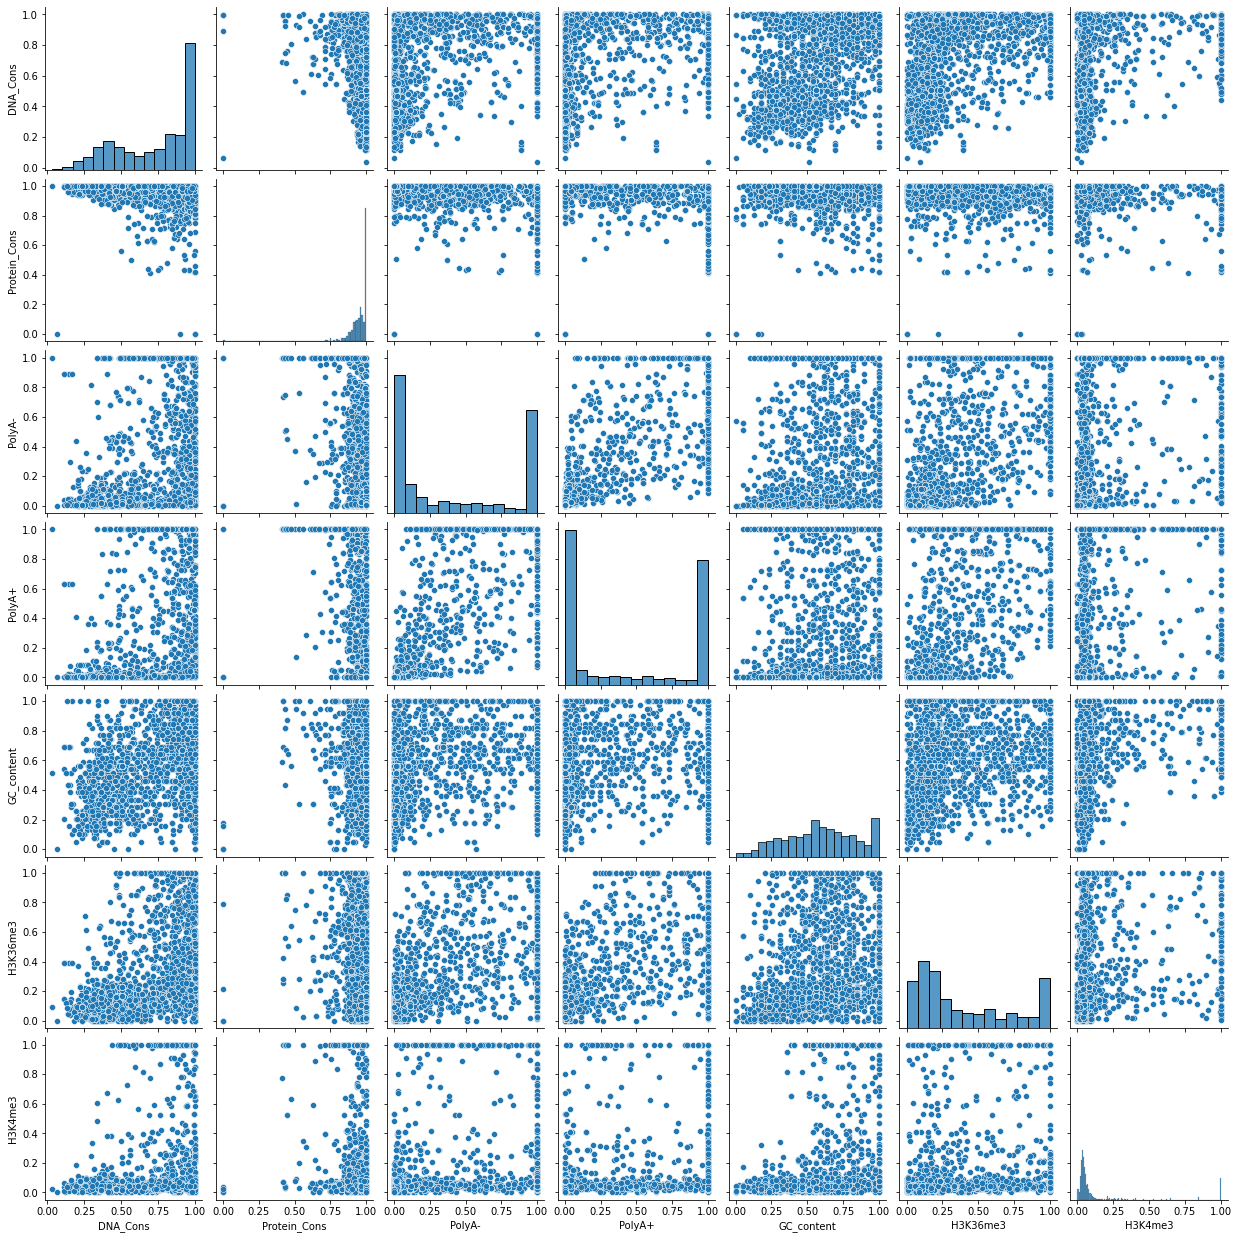

In [257]:
sns.pairplot(come_genecode_41_pc[["DNA_Cons", "Protein_Cons", "PolyA-", "PolyA+", "GC_content", 'H3K36me3', 'H3K4me3','Transcript_length']])

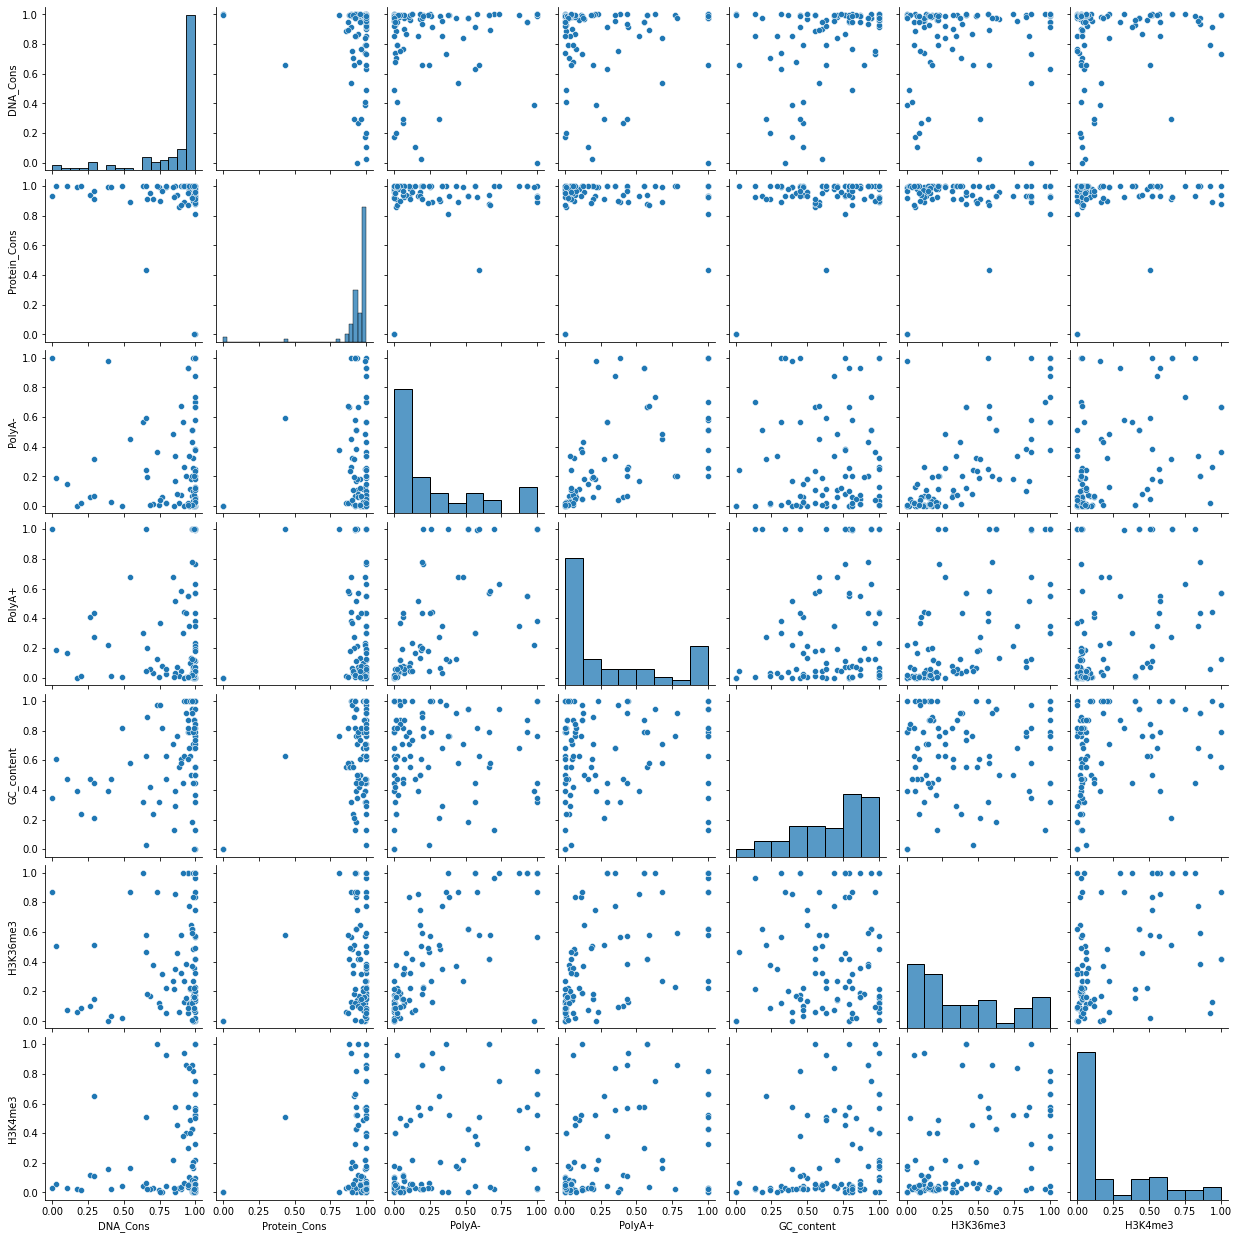

In [258]:
sns.pairplot(come_genecode_19_pc[["DNA_Cons", "Protein_Cons", "PolyA-", "PolyA+", "GC_content", "H3K36me3", "H3K4me3","Transcript_length"]])

In [259]:
correlation_matrix_sub_19_pc = sub_19_pc.corr()

In [260]:
correlation_matrix_sub_41_pc = sub_41_pc.corr()

<AxesSubplot:>

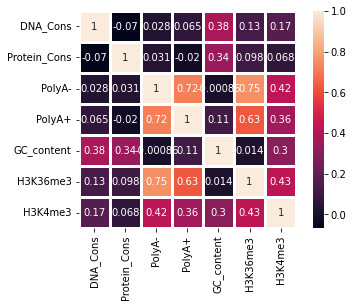

In [261]:
sns.heatmap(correlation_matrix_sub_19_pc, square=True, annot=True, linewidths=3)

<AxesSubplot:>

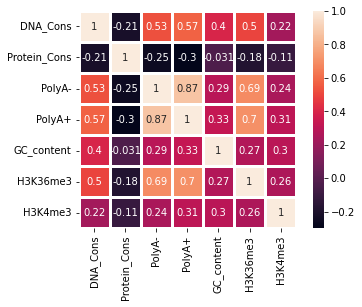

In [262]:
sns.heatmap(correlation_matrix_sub_41_pc, square=True, annot=True, linewidths=3)

In [263]:
file_in = "data/gencode.v38.lncRNA_transcripts.fa"
tr_ids = []
gen_ids = []
seqs = []

In [271]:
for seq_record in SeqIO.parse(open(file_in, mode='r'), 'fasta'):

    # remove .id from .description record (remove all before first space)

    seq_record.description=' '.join(seq_record.description.split()[1:])
    tr_id = seq_record.id.split("|")[0]
    gen_id = seq_record.id.split("|")[1]
    seq = seq_record.seq
    tr_ids.append(tr_id)
    gen_ids.append(gen_id)
    seqs.append(seq)
df = pd.DataFrame({'Gene_id':gen_ids, 'transcript_id': tr_ids, 'Seq': seqs})
df.to_csv("data/pc_transcripts_38.csv")
merged = merged_res.merge(df, on=['transcript_id'])

In [277]:
merged_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10852 entries, 0 to 10851
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gene_ID             10852 non-null  object
 1   annot_tr            10852 non-null  object
 2   gene_name           10852 non-null  object
 3   chromosome          10852 non-null  object
 4   strand_x            10852 non-null  object
 5   TSS source          10852 non-null  object
 6   primary_TSS_5prime  10852 non-null  int64 
 7   primary_TSS_3prime  10852 non-null  int64 
 8   seqname             10852 non-null  object
 9   start               10852 non-null  int64 
 10  end                 10852 non-null  int64 
 11  strand_y            10852 non-null  object
 12  frame               10852 non-null  object
 13  gene_id             10852 non-null  object
 14  gene_type           10852 non-null  object
 15  level               10852 non-null  object
 16  transcript_id       10

In [272]:
merged

,Gene_ID,annot_tr,gene_name,chromosome,strand_x,TSS source,primary_TSS_5prime,primary_TSS_3prime,seqname,start,...,gene_id,gene_type,level,transcript_id,transcript_type,transcript_name,exon_number,exon_id,Gene_id,Seq
0,LH03566,P1P2,RP5-940J5.9,chr12,-,"CAGE, primary peaks",6647458,6647477,chr12,6537794,...,ENSG00000269968.1,lncRNA,2,ENST00000602946.1,lncRNA,RP5-940J5.9-001,,,ENSG00000269968.1,"(G, G, T, T, G, A, G, C, A, C, A, G, G, G, T, ..."
1,LH03566,P1P2,RP5-940J5.9,chr12,-,"CAGE, primary peaks",6647458,6647477,chr12,6537794,...,ENSG00000269968.1,lncRNA,2,ENST00000602946.1,lncRNA,RP5-940J5.9-001,,,ENSG00000269968.1,"(G, G, T, T, G, A, G, C, A, C, A, G, G, G, T, ..."
2,LH03275,P1P2,RP11-386G11.10,chr12,+,"CAGE, primary peaks",49521567,49521570,chr12,49127782,...,ENSG00000258017.2,lncRNA,2,ENST00000548149.1,lncRNA,RP11-386G11.10-002,,,ENSG00000258017.2,"(T, T, T, T, G, A, T, G, T, T, A, A, T, G, A, ..."
3,LH03275,P1P2,RP11-386G11.10,chr12,+,"CAGE, primary peaks",49521567,49521570,chr12,49127782,...,ENSG00000258017.2,lncRNA,2,ENST00000548149.1,lncRNA,RP11-386G11.10-002,,,ENSG00000258017.2,"(T, T, T, T, G, A, T, G, T, T, A, A, T, G, A, ..."
4,LH03275,P1P2,RP11-386G11.10,chr12,+,"CAGE, primary peaks",49521567,49521570,chr12,49127782,...,ENSG00000258017.2,lncRNA,2,ENST00000548149.1,lncRNA,RP11-386G11.10-002,,,ENSG00000258017.2,"(T, T, T, T, G, A, T, G, T, T, A, A, T, G, A, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21699,LH16806,CUFF.51200.1,LINC00106,chrX,-,Annotation,1517852,1517852,chrX,1397025,...,ENSG00000236871.7,lncRNA,2,ENST00000430235.7,lncRNA,LINC00106-201,,,ENSG00000236871.7,"(A, A, G, C, A, T, T, T, G, G, C, A, A, G, C, ..."
21700,LH16806,CUFF.51200.1,LINC00106,chrX,-,Annotation,1517852,1517852,chrY,1396427,...,ENSG00000236871.7_PAR_Y,lncRNA,2,ENST00000434938.7_PAR_Y,lncRNA,LINC00106-202,,,ENSG00000236871.7_PAR_Y,"(G, G, A, G, G, G, A, A, C, A, A, C, A, C, A, ..."
21701,LH16806,CUFF.51200.1,LINC00106,chrX,-,Annotation,1517852,1517852,chrY,1396427,...,ENSG00000236871.7_PAR_Y,lncRNA,2,ENST00000434938.7_PAR_Y,lncRNA,LINC00106-202,,,ENSG00000236871.7_PAR_Y,"(G, G, A, G, G, G, A, A, C, A, A, C, A, C, A, ..."
21702,LH16806,CUFF.51200.1,LINC00106,chrX,-,Annotation,1517852,1517852,chrY,1397025,...,ENSG00000236871.7_PAR_Y,lncRNA,2,ENST00000430235.7_PAR_Y,lncRNA,LINC00106-201,,,ENSG00000236871.7_PAR_Y,"(A, A, G, C, A, T, T, T, G, G, C, A, A, G, C, ..."


In [273]:
merged.columns

Index(['Gene_ID', 'annot_tr', 'gene_name', 'chromosome', 'strand_x',
       'TSS source', 'primary_TSS_5prime', 'primary_TSS_3prime', 'seqname',
       'start', 'end', 'strand_y', 'frame', 'gene_id', 'gene_type', 'level',
       'transcript_id', 'transcript_type', 'transcript_name', 'exon_number',
       'exon_id', 'Gene_id', 'Seq'],
      dtype='object')

In [278]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21704 entries, 0 to 21703
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gene_ID             21704 non-null  object
 1   annot_tr            21704 non-null  object
 2   gene_name           21704 non-null  object
 3   chromosome          21704 non-null  object
 4   strand_x            21704 non-null  object
 5   TSS source          21704 non-null  object
 6   primary_TSS_5prime  21704 non-null  int64 
 7   primary_TSS_3prime  21704 non-null  int64 
 8   seqname             21704 non-null  object
 9   start               21704 non-null  int64 
 10  end                 21704 non-null  int64 
 11  strand_y            21704 non-null  object
 12  frame               21704 non-null  object
 13  gene_id             21704 non-null  object
 14  gene_type           21704 non-null  object
 15  level               21704 non-null  object
 16  transcript_id       21

In [279]:
merged.to_csv("data/final_merge.csv")